<a href="https://colab.research.google.com/github/NIlesh-Thamke/Machine-Learning-Practicals/blob/main/Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [43]:
data = pd.read_csv('data.csv')
print(data.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [44]:
print(data.isnull())

       date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  sqft_above  sqft_basement  yr_built  \
0          False  False      False  

In [45]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [46]:
X = data[['sqft_living','floors','bedrooms']]  # Features (independent variables)
y = data["price"]

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sqft_living, y=price, alpha=0.6)
plt.xlabel("sqft_living")
plt.ylabel("Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

NameError: name 'sqft_living' is not defined

<Figure size 800x600 with 0 Axes>

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

print("\nModel Performance Metrics:")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
r2_score = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2_score:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 223741.31
Mean Squared Error (MSE): 991266809259.07
Root Mean Squared Error (RMSE): 995623.83
R-squared (R2) Score: 0.03


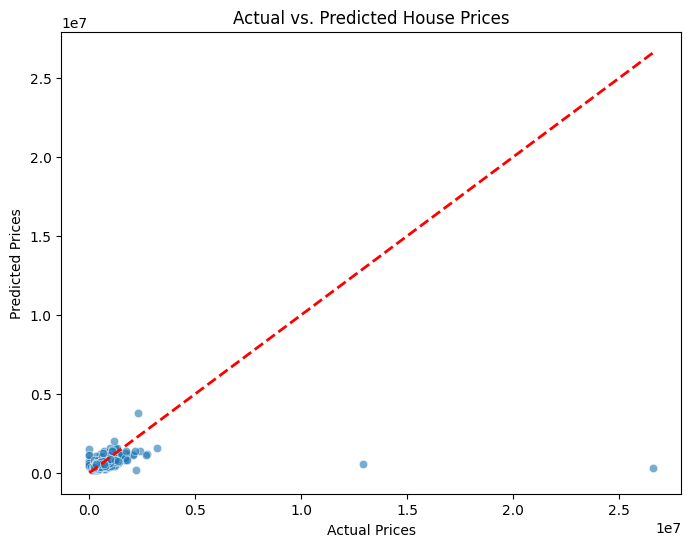

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()

Bonus Assignment

In [30]:
k_values = [3, 5, 7, 10, 15]  # Different values of k to experiment
results = []

In [52]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

y_pred_lr = linear_model.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [54]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

In [55]:
plt.figure(figsize=(10, 5))
plt.plot(results_df["k"], results_df["MAE"], marker='o', label="MAE")
plt.plot(results_df["k"], results_df["MSE"], marker='s', label="MSE")
plt.plot(results_df["k"], results_df["RMSE"], marker='^', label="RMSE")
plt.axhline(y=mae_lr, color='r', linestyle='--', label="Linear Regression MAE")
plt.axhline(y=mse_lr, color='g', linestyle='--', label="Linear Regression MSE")
plt.axhline(y=rmse_lr, color='b', linestyle='--', label="Linear Regression RMSE")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Metrics")
plt.title("Effect of k on KNN Regression Performance")
plt.legend()
plt.show()

NameError: name 'results_df' is not defined

<Figure size 1000x500 with 0 Axes>